<a href="https://colab.research.google.com/github/jagtapuday/Mnist_Model/blob/main/Mnist_Multilayer_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multilayer Neural Network(MNIST Dataset)

## Import Libraries

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [2]:
Random_State=2020

## Import Dataset

In [97]:
def Import_Data():
    # df=pd.read_csv("DNN_fashion_MNIST/fashion-mnist_train.csv")
    train_df=pd.read_csv("/content/drive/My Drive/Deep Learning/DNN/DNN_fashion_MNIST/ \
    fashion-mnist_train.csv",nrows=10000,dtype=np.int32)
    return train_df

## Min-Max Scalar Normalization

In [4]:
def Min_Max_Norm(X):
    temp=X.values/255
    return pd.DataFrame(temp,columns=X.columns)

## Train Test Split

In [149]:
def Train_Test(X,y):
    X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=Random_State)
    X_train=X_train.astype("float32")
    X_test=X_test.astype("float32")
    X_train/=255.0
    X_test/=255.0

    return X_train,X_test,y_train,y_test

## DataFrame To Store Results

In [6]:
Result_df=pd.DataFrame(columns=["Dimention of hidden layer","Learning Rate","Regularization","n_Epoch",
                                "Train_Accuracy","Test Accuracy","Comment"])

In [7]:
#To store result in the dataframe
def Save_Result(hidden_layer,Learning_Rate,Regularization,n_Epoch,Train_Accuracy,Test_Accuracy):
    global Result_df
    Remark=input("Please Enter Remark : ")
    result={"Dimention of hidden layer":hidden_layer,"Learning Rate":Learning_Rate,
            "Regularization":Regularization,"n_Epoch":n_Epoch,
                                "Train_Accuracy":Train_Accuracy,
                                "Test Accuracy":Test_Accuracy,"Comment":Remark}
    Result_df=Result_df.append(result,ignore_index=True)
    print("Data Saved")
    return True

## Visualisation

In [8]:
def Plot_Data(X):
    num = 10
    images = X.iloc[:10,1:]
    labels = X.iloc[:10,0]
    num_row = 2
    num_col = 5
    # plot images
    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(num):
        img=np.reshape(X.iloc[i,1:].to_list(),(28,28))
        ax = axes[i//num_col, i%num_col]
        ax.imshow(img, cmap='gray')
        ax.set_title('Label: {}'.format(labels[i]))
    plt.tight_layout()
    plt.show()
    return 


def Show_Loss_Graph(loss):
    keys=list(loss.keys())
    values=list(loss.values())
    plt.xlabel("n Epoch")
    plt.ylabel("Loss")
    print("Starting Loss : ",values[0])
    print("Ending Loss :",values[-1])
    sns.lineplot(x=keys,y=values)
    return 

## Predicting results based on model

In [148]:
def Predict_Result(model,X):
    
    #Input X 
    #Model
    
    W1,B1,W2,B2,W3,B3,W4,B4=model["W1"],model["B1"],model["W2"],model["B2"],model["W3"], \
                            model["B3"],model["W4"],model["B4"]
    #Layer 1
    Z1=X.dot(W1)+B1
    A1=np.tanh(Z1)
    
    #Layer 2
    Z2=A1.dot(W2)+B2
    A2=np.tanh(Z2)
    
    #Layer 3
    Z3=A2.dot(W3)+B3
    A3=np.tanh(Z3)
    
    #Layer 4
    Z4=A3.dot(W4)+B4
    Z4=np.exp(Z4)
    proba=Z4/np.sum(Z4,axis=1,keepdims=True)

    return np.argmax(proba,axis=1)
    

## Calculate Accuracy on whole dataset

In [150]:
def Calculate_Accuracy_Update(model_,X_,y_):
    X=X_.copy()
    y=y_.copy()
    
    y_hat=Predict_Result(model_,X)

    Accuracy=accuracy_score(y,y_hat)

    X=pd.DataFrame(X,columns=features[1:])
    X["y"]=y
    X["y_hat"]=y_hat
    
    print("Accuracy : ",Accuracy )

    print(confusion_matrix(y,y_hat)) 

    return X,Accuracy

## Calculate loss on Batch

In [147]:
def Calculate_Loss_Function(model,X,y):
    # Function to calculate loss on whole dataset
#     print(y)
    W1,B1,W2,B2,W3,B3,W4,B4=model["W1"],model["B1"],model["W2"],model["B2"],model["W3"], \
                            model["B3"],model["W4"],model["B4"]
    
    #Layer 1
    Z1=X.dot(W1)+B1
    A1=np.tanh(Z1)
    
    #Layer 2
    Z2=A1.dot(W2)+B2
    A2=np.tanh(Z2)
    
    #Layer 3
    Z3=A2.dot(W3)+B3
    A3=np.tanh(Z3)
    
    #Layer 4
    Z4=A3.dot(W4)+B4
    Z4=np.exp(Z4)
    A4=Z4/np.sum(Z4,axis=1,keepdims=True)
    
    #output Layer -> Softmax
    exp_op=np.exp(A4)
    
    #To calculate probabilities
    proba=exp_op/np.sum(exp_op,axis=1,keepdims=True)
    
    #Calculate Correct loss 
    y=y.astype(int)
    log_proba=-np.log(proba[range(count),y])

    loss=np.sum(log_proba)
    
    #
    loss+=(lambda_/2) *(np.sum(np.square(W1))+
                        np.sum(np.square(W2))+
                        np.sum(np.square(W3))+
                        np.sum(np.square(W4)))
    loss/=count
    return loss

## DropOut

In [ ]:
def Drop_Out_Forword(Layers,Keep_prob=1):
    if Keep_prob>0.0:
        Drop_Out_L=np.random.randn(Layers.shape[1],Layers[0])/np.sqrt(Layers[0])
        Drop_Out_L=(Drop_Out_L<Keep_prob).astype(np.float)
        Layers*=Drop_Out
        Layers/=Keep_prob
    return Layers,Drop_Out_L
def Drop_Out_Backword(Diff_Layers,Drop_Out,Keep_prob=1):
    if keep_Prob>0:
        Diff_Layers*=Drop_Out
        Diff_Layers/=keep_Prob
    return Diff_Layers

## Mini Batches

In [52]:
def Create_Mini_Batches(Batch_Size,X,y):
    # print("Mini-Batch In")
    y=y.reshape(y.shape[0],1)
    Mini_Batches = [] 
    Data = np.hstack((X, y))
    np.random.shuffle(Data) 
    n_minibatches = Data.shape[0] // Batch_Size 
    i = 0
    for i in range(n_minibatches + 1): 
        mini_batch = Data[i * Batch_Size:(i + 1)*Batch_Size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1] 
        # print(X_mini)
        # print(Y_mini)
        
        Mini_Batches.append((X_mini, Y_mini))
        # print("Batch Created") 
    if Data.shape[0] % Batch_Size != 0: 
        mini_batch = Data[i * Batch_Size:Data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1] 
        Mini_Batches.append((X_mini, Y_mini)) 
    # print("Mini-Batch Clear")
    return Mini_Batches 

## Train Model

In [157]:
def Train_Model(Layers,Model,X,y,Epoch=1000,Batch_Size=32,Print_Loss=False):
    
    np.random.seed(Random_State)
    
    if Model==None:
        W1=np.random.randn(X.shape[1],Layers[0])/np.sqrt(Layers[0])
        B1=np.zeros((1,Layers[0]))
        
        W2=np.random.randn(Layers[0],Layers[1])/np.sqrt(Layers[1])
        B2=np.zeros((1,Layers[1]))
        
        W3=np.random.randn(Layers[1],Layers[2])/np.sqrt(Layers[2])
        B3=np.zeros((1,Layers[2]))
        
        W4=np.random.randn(Layers[2],Layers[3])/np.sqrt(Layers[3])
        B4=np.zeros((1,Layers[3]))
        
    else : 
        W1,B1,W2,B2,W3,B3,W4,B4=Model["W1"],model["B1"],model["W2"],model["B2"],model["W3"], \
                            model["B3"],model["W4"],model["B4"]
    

    assert((X.shape[1],Layers[0])==W1.shape)
    "Shape of X={} does not match with W1={}".format((X.shape[1],Layers[0]),W1.shape)
    Model={}
    
    for i in range(Epoch):
        
        
        Mini_Batches = Create_Mini_Batches(Batch_Size,X, y)
        for mini_batch in Mini_Batches:
            Min_X,Min_Y=mini_batch
            
            if len(Min_X)!=Batch_Size:
                break

            ########### Forward Propagation ###########
            #Layer 1
            Z1=Min_X.dot(W1)+B1
            A1=np.tanh(Z1)
            assert(Z1.shape==A1.shape) ,"Shape of Z1 and A1 does not match"

            #Layer 2
            Z2=A1.dot(W2)+B2
            A2=np.tanh(Z2)
            assert(Z2.shape==A2.shape) ,"Shape of Z2 and A2 does not match"


            #Layer 3
            Z3=A2.dot(W3)+B3
            A3=np.tanh(Z3)
            assert(Z3.shape==A3.shape), "Shape of Z3 and A3 does not match"


            #Layer 4
            Z4=A3.dot(W4)+B4
            Z4=np.exp(Z4)
            proba=Z4/np.sum(Z4,axis=1,keepdims=True)
            assert(Z4.shape==proba.shape) ,"Shape of Z4 and proba does not match"


            ########### Backward Propagation ###########
            #Layer 4
            dZ4=proba
  
            Min_Y=Min_Y. astype(int)
            dZ4[range(Batch_Size),Min_Y]-=1

            dW4=(1/Batch_Size)*(A3.T).dot(dZ4)

            assert(dW4.shape==W4.shape) ,"Shape of dW4={} and W4={} does not match".format(dW4.shape, W4.shape)

            dB4=(1/Batch_Size)*np.sum(dZ4,axis=0,keepdims=True)

            #Layer 3
            dA3=dZ4.dot(W4.T)

            dZ3=dA3*(1-A3**2)

            dW3=(1/Batch_Size)*(A2.T).dot(dZ3)
            assert(dW3.shape==W3.shape) ,"Shape of dW3 and W3 does not match"


            dB3=(1/Batch_Size)*np.sum(dZ3,axis=0,keepdims=0)

            # Layer 2

            dA2=dZ3.dot(W3.T)

            dZ2=dA2*(1-A2**2)

            dW2=(1/Batch_Size)*(A1.T).dot(dZ2)

            assert(dW2.shape==W2.shape), "Shape of dW2 and W2 does not match"


            dB2=(1/Batch_Size)*np.sum(dZ2,axis=0,keepdims=0)

            # Layer 1

            dA1=dZ2.dot(W2.T)

            dZ1=dA1*(1-A1**2)

            dW1=(1/Batch_Size)*(Min_X.T).dot(dZ1)

            assert(dW1.shape==W1.shape), "Shape of dW1 and W1 does not match"

            dB1=(1/Batch_Size)*np.sum(dZ1,axis=0,keepdims=0)



            # Regularization

            dW4+=lambda_*dW4
            dW3+=lambda_*dW3
            dW2+=lambda_*dW2
            dW1+=lambda_*dW1

            #Gradient Descent

            W4-=Learning_Rate*dW4
            W3-=Learning_Rate*dW3
            W2-=Learning_Rate*dW2
            W1-=Learning_Rate*dW1


            # set model values 

        Model={"W4":W4,"B4":B4,
            "W3":W3,"B3":B3,
            "W2":W2,"B2":B2,
            "W1":W1,"B1":B1
              }
        if Print_Loss and i%50==0:
            loss=Calculate_Loss_Function(Model,X,y)
            print("Loss after %i epoch is %f"%(i,loss))

            loss_dict[i]=loss
    
    loss=Calculate_Loss_Function(Model,X,y)
    print("Loss after %i epoch is %f"%(i,loss))

    loss_dict[i]=loss
    
    return Model 


## Main Function

In [128]:
def Main():
    Model=None
    model=Train_Model(Layers,Model,X_train.values,y_train.values,Epoch,
                      Batch_Size=32,Print_Loss=True)
    print("Loss Graph")
    Show_Loss_Graph(loss_dict)
    print("Training Data")
    train_y_pred,train_acc=Calculate_Accuracy_Update(model,X_train.values,y_train.values)
    print("Testing Data")
    test_y_pred,test_acc=Calculate_Accuracy_Update(model,X_test.values,y_test.values)
    

    Save_Result(Layers,Learning_Rate,lambda_,Epoch,train_acc,test_acc)

In [22]:
MNIST_Data=Import_Data()

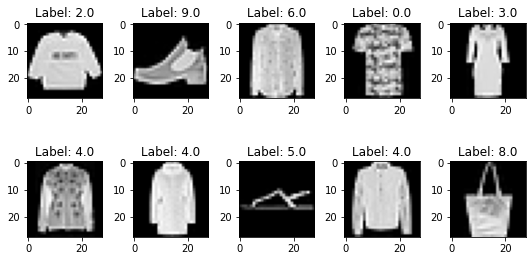

In [99]:
Plot_Data(MNIST_Data)

In [100]:
X_train,X_test,y_train,y_test =Train_Test(MNIST_Data.iloc[:,1:],MNIST_Data.iloc[:,0])

### Parameters and Result

Loss after 0 epoch is 2.295971
Loss after 5 epoch is 2.226708
Loss after 10 epoch is 2.180825
Loss after 15 epoch is 2.165370
Loss after 20 epoch is 2.158039
Loss after 25 epoch is 2.153568
Loss after 29 epoch is 2.149459
Loss Graph
Starting Loss :  2.2959712167061617
Ending Loss : 2.1494594457770115
Training Data
Testing Data
Please Enter Remark : Demo
Data Saved


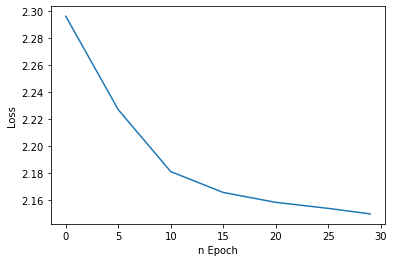

In [129]:
# Updated 
features=MNIST_Data.columns
loss_dict={}
count=len(X_train)
Layers=[5,5,4,10]
Learning_Rate=0.01
lambda_=0.0
Epoch=30
Main()

### Parameters and Result

Loss after 0 epoch is 2.136704
Loss after 5 epoch is 1.880307
Loss after 10 epoch is 1.790262
Loss after 15 epoch is 1.740906
Loss after 20 epoch is 1.714205
Loss after 25 epoch is 1.696504
Loss after 30 epoch is 1.681717
Loss after 35 epoch is 1.662865
Loss after 40 epoch is 1.649505
Loss after 45 epoch is 1.643417
Loss after 49 epoch is 1.643828
Loss Graph
Starting Loss :  2.1367043268372012
Ending Loss : 1.6438277219333626
Training Data
Accuracy :  0.8705
[[676   0   3  63   3   3  72   0   1   0]
 [  0 765  11   8   2   0   1   0   0   0]
 [  3   3 553   5 126   0  60   0   0   0]
 [  9   8   1 751  21   0  10   0   1   0]
 [  0   3  20  19 749   0  17   0   0   0]
 [  0   0   0   0   0 732   0  55   4   4]
 [ 79   2  88  61 165   0 424   1   0   0]
 [  0   0   0   0   0   1   0 808   1  10]
 [  0   0   1   3   5   0   3   1 769   2]
 [  0   0   0   0   0   0   0  77   0 737]]
Testing Data
Accuracy :  0.8165
[[150   1   2  15   1   1  18   0   0   0]
 [  1 175   2   5   1   0   0  

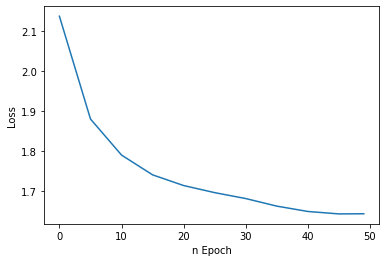

In [154]:
features=MNIST_Data.columns
loss_dict={}
count=len(X_train)
Layers=[15,20,5,10]
Learning_Rate=0.05
lambda_=0.01
Epoch=50
Main()

Loss after 0 epoch is 2.244603
Loss after 50 epoch is 1.795972
Loss after 100 epoch is 1.731818
Loss after 150 epoch is 1.695152
Loss after 199 epoch is 1.667242
Loss Graph
Starting Loss :  2.24460340471241
Ending Loss : 1.6672422745681037
Training Data
Accuracy :  0.8585
[[699  12   5  37   2   0  60   0   5   1]
 [ 17 758   1   9   0   0   2   0   0   0]
 [ 19   0 561   1 118   0  49   0   2   0]
 [ 17   9   6 706  13   0  50   0   0   0]
 [  2   1  44  27 668   0  63   0   3   0]
 [  0   0   1   0   0 736   0  23   3  32]
 [149   1 107  15 101   0 440   0   6   1]
 [  0   0   0   0   0  21   0 755   1  43]
 [  2   0   9   2   1   1  11   1 757   0]
 [  2   0   0   0   0   8   0  16   0 788]]
Testing Data
Accuracy :  0.785
[[161   3   1   5   2   0  13   0   3   0]
 [  3 176   0   4   1   0   0   0   0   1]
 [  6   0 137   2  44   0  10   0   1   1]
 [ 10  14   2 172   7   0   4   0   2   0]
 [  1   0  20  13 129   0   8   0   0   0]
 [  1   0   3   0   0 164   0  12  11  22]
 [ 42  

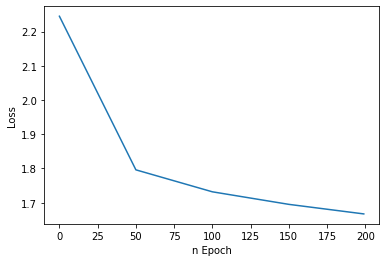

In [158]:
#Batch 32 
features=MNIST_Data.columns
loss_dict={}
count=len(X_train)
Layers=[8,10,15,10]
Learning_Rate=0.01
lambda_=0.01
Epoch=200
Main()

### Parameters and Result

Loss after 0 epoch is 1.956923
Loss after 5 epoch is 1.724754
Loss after 10 epoch is 1.676029
Loss after 15 epoch is 1.642869
Loss after 20 epoch is 1.630628
Loss after 25 epoch is 1.614728
Loss after 30 epoch is 1.604507
Loss after 35 epoch is 1.590708
Loss after 40 epoch is 1.599536
Loss after 45 epoch is 1.602120
Loss after 50 epoch is 1.570819
Loss after 55 epoch is 1.564760
Loss after 60 epoch is 1.558054
Loss after 65 epoch is 1.571224
Loss after 70 epoch is 1.555890
Loss after 75 epoch is 1.565212
Loss after 80 epoch is 1.539607
Loss after 85 epoch is 1.551109
Loss after 90 epoch is 1.523100
Loss after 95 epoch is 1.520647
Loss after 100 epoch is 1.511897
Loss after 105 epoch is 1.519970
Loss after 110 epoch is 1.506717
Loss after 115 epoch is 1.517770
Loss after 120 epoch is 1.501469
Loss after 125 epoch is 1.521493
Loss after 130 epoch is 1.502740
Loss after 135 epoch is 1.509469
Loss after 140 epoch is 1.530678
Loss after 145 epoch is 1.509635
Loss after 150 epoch is 1.499222

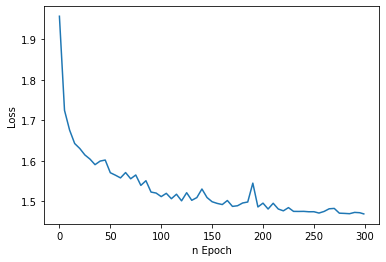

In [155]:
features=MNIST_Data.columns
loss_dict={}
count=len(X_train)
Layers=[25,20,15,10]
Learning_Rate=0.05
lambda_=0.001
Epoch=300
Main()

# Final Result

In [159]:
Result_df

,Dimention of hidden layer,Learning Rate,Regularization,n_Epoch,Train_Accuracy,Test Accuracy,Comment
0,"[5, 5, 4, 10]",0.10,0.000,20,None,None,Demo
1,"[5, 5, 4, 10]",0.10,0.000,30,None,None,Test
2,"[5, 5, 4, 10]",0.01,0.000,30,None,None,Test
3,"[5, 5, 4, 10]",0.01,0.000,30,None,None,Test
4,"[5, 5, 4, 10]",0.01,0.000,50,None,None,Test
5,"[5, 5, 4, 10]",0.01,0.000,30,None,None,Test
6,"[5, 5, 4, 10]",0.01,0.000,30,0.3225,0.306,Demo
7,"[50, 10, 15, 10]",0.03,0.000,500,1,0.841,Overfitting
8,"[8, 10, 15, 10]",0.01,0.001,200,0.858125,0.785,With small set of Nodes
9,"[5, 5, 4, 10]",0.01,0.001,1000,0.776125,0.6935,With 1000 Epoch
